# Realtime Face Detection using OpenCV

Sample code to detect faces from live camera (web cam).

Install all required packages using pip.

In [1]:
!pip install opencv-contrib-python
!pip install numpy
!pip install matplotlib

Import the packages that are to be used.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

Function to display video inline instead of new window.

In [3]:
def show_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(image)
    plt.show()

Initialise the Web Cam

In [4]:
cap = cv2.VideoCapture(0)

Use a LBPH Cascade Classifier from OpenCV itself that is able to detect faces.

In [5]:
faceCascade = cv2.CascadeClassifier('../pett-notebooks/cascades/lbpcascades/lbpcascade_frontalface_improved.xml')

Faces in the live video will be displayed using bounding boxes. Set the outline color and size of the boxes.

Using red color.

In [6]:
rect_color = (0, 0, 255) # this BGR, not RGB (0-255, regular)
rect_stroke = 2

Opens OpenCV with frames updated from the web camera.

Convert the frames into grayscale color space and use harcasscade classifier to detect faces with bounding boxes.

In [7]:
def main():
    try:
        while(True):
            ret, frame = cap.read()
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = faceCascade.detectMultiScale(gray, scaleFactor = 1.5, minNeighbors = 5)
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), rect_color, rect_stroke)
            show_image(cv2.flip(frame, 1))
            display.clear_output(wait=True)
    except KeyboardInterrupt:
        pass
    finally:
        cap.release()

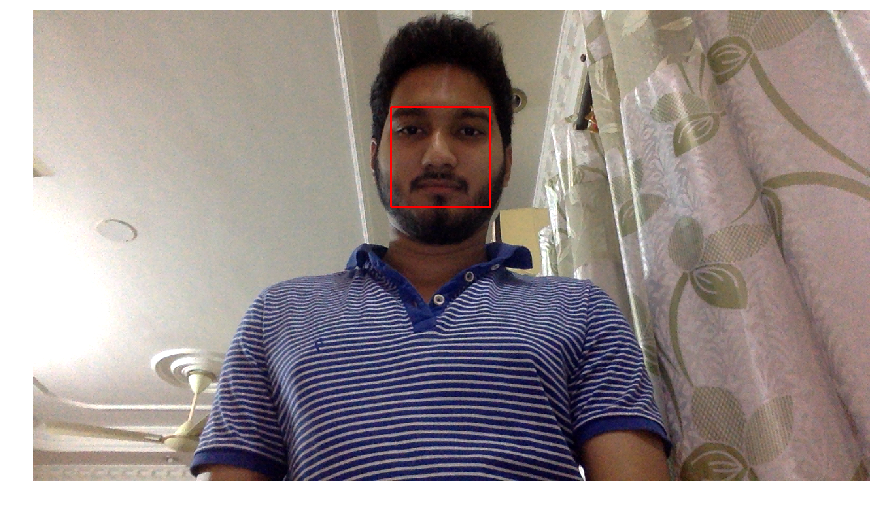

In [8]:
main()

# ✨